In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# SIMPLE LINEAR MODEL #

Predicts Ouput as a linear weighted sum
y = w0 + w1x
wo aka bias factor

Assumptions:
1. Feature and target Linear Reln
2. No Multi Collinearity between features 
3. Homoscedasticity i.e. reln with error. Error distibution should be random and no pattern
4. Normal Distribution of Error Terms

Basis Function
Function to transform data to new space or form
Eg. Polynomial, Gaussian, Sigmoidal 

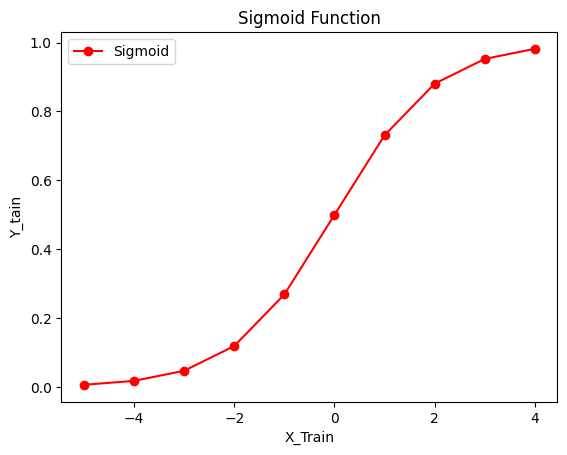

In [23]:
#SIGMOID FUNCTION

x_train = [x for x in range(-5, 5)]
x_train_np = np.array(x_train)
y_train = 1 / (1 + np.exp(-x_train_np))

plt.xlabel('X_Train')
plt.ylabel('Y_tain')
plt.title('Sigmoid Function')

plt.plot(x_train, y_train, marker='o', c='r', label='Sigmoid')
plt.legend()

plt.show()

## MULTIPLE LINEAR REGRESSION ##

y = w0 + w1 x1 + w2 x2 + ... + wn xn

1. In y = w0 + w1 x + w2 x, Regression Plane is Generated
2. In 3 features, hyperplane formed of 3 degree

# Parameter Estimation Techiques Can be ##
A. Probabilistic Like Maximum Likelihood Estimation (MLE)

B. Least Square Estimation (LSE) which may be exact (Ordinary Least Squares) or iterative (Gradient Descent) 

## 1. Exact Methods - OLS

Sum of Squared Error, SSE is always convex (Because Order 2 Polynomial) and is used as COST FUNCTION

SSE 

    = Sum of (Yhat - Yi)^2 = sum of ei square 
    
    = e * eTranspose 
    
    = (y - X beta)T (y - X Beta)

    = (yTy - 2 XT BetaT y + BT XT y B)

derivative w.r.t beta,

0    =  (2XTXB -2XT Y)

Beta = (XT X)-1 XTy

## 2. Iterative Methods - Gradient Descent

Sequence of approximations using an update rule interative method. It is first order iterative optimization approach

1. Random initialization of paramters

2. Calculate partial derivative of function with respect to parameter 

3. Update parameter as w = w - alfa * derivative term (alfa = learning rate). Simultaneously update all parameters.

4. Repeat 2 and 3 till convergence to minimum 

Cost Function = 1/2 * SSE, 1/2 so that 2 and 1/2 cancel each other after derivative w.r.t parameters 

Learning rate too high = Oscillating Effect &
Learning rate too low = slow model



# IMPLEMENTATION

In [24]:
from sklearn.model_selection import train_test_split
# TO SPLIT AVAILABLE DATA INTO TRAINING SET AND TEST SET SO THAT TARINED MODEL HAS TO BE TESTED BY SEPARATE VALID DATA SETS
from sklearn.linear_model import LinearRegression, SGDRegressor
# LINEAR REGRESSION BY DEFAULT USES OLS AND SGDRegressor uses Gradient Descent Algorithm
from sklearn.preprocessing import StandardScaler
# TO SCALE DATA 
from sklearn.metrics import mean_squared_error, r2_score
# Metrices MSE and R Squared Error

In [31]:
df = pd.read_csv('https://raw.githubusercontent.com/nguyen-toan/ISLR/master/dataset/Advertising.csv')
df=df[['TV','Radio','Newspaper','Sales']]
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [48]:
df.info()
# SEE IF NULL VALUES PRESENT IN COLUMNS
df.describe()
# BASIC STATISTICAL FEATURES 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


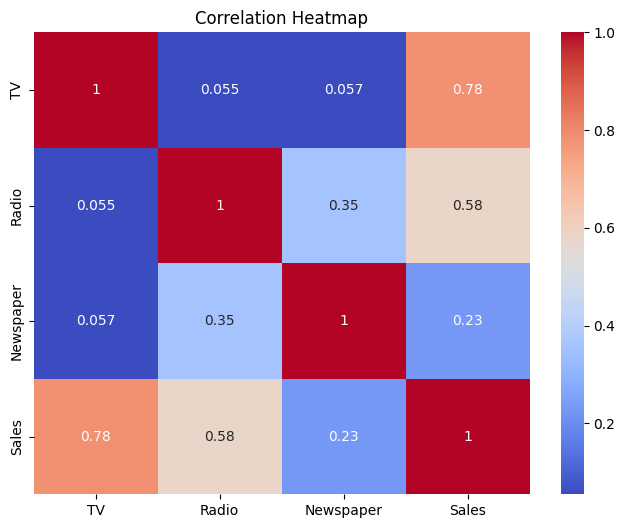

In [50]:
# CORRELATION FINDING BY HEATMAP

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# SEE SALES COLUMN OR ROW AND SEE IF MULTICOLLINEARITY EXISTS OR NOT. 
# 0.35 Multicollinearity is significant between Radio and Newspaper and can't be ignored. 
# Maybe some issues may arise or maybe newspaper may not be needed. Part of Feature Engineering

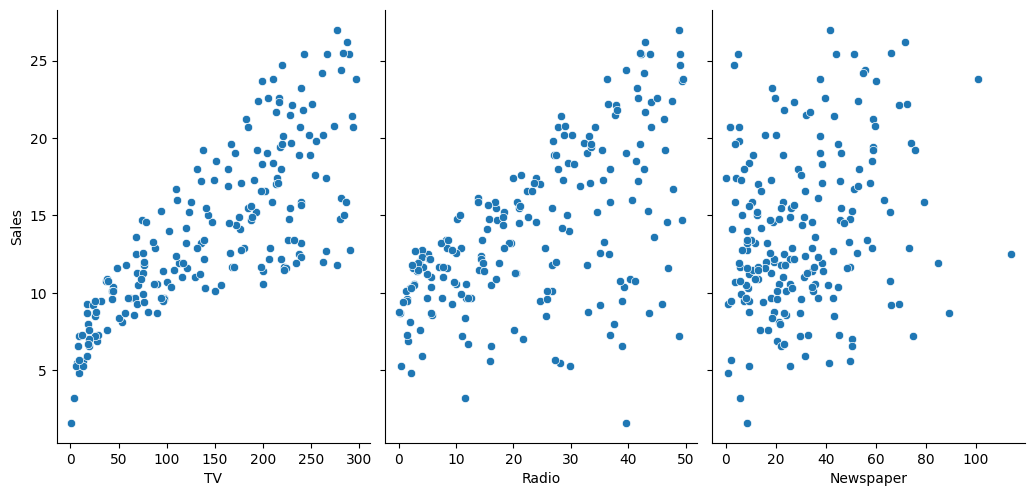

In [42]:
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height =5, aspect=0.7)
plt.show()

# SIMPLE LINEAR REGRESSION MODELING

1. Read df

2. Remove all Columns except 'TV' and 'Sales'

3. Divide df to Feature (X), Target (Y) and also Train-Test Split the data @ 80:20

4. Model 


In [55]:
data = df[['TV', 'Sales']]
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [58]:
X = data['TV']
Y = data['Sales']
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [61]:
# Initializing Linear Regression Model

model = LinearRegression()
model.fit(X_Train.values.reshape(-1, 1), Y_Train)

#.fit_predict return outputs for X Train if used

LinearRegression()

In [66]:
print(model.intercept_, model.coef_)

#Printing a and b of a+bx

7.119638430592953 [0.04652973]


In [69]:
#EVALUATING MODEL

Y_Predicted = model.predict(X_Test.values.reshape(-1, 1))
mse = mean_squared_error(Y_Test, Y_Predicted)
r2 = r2_score(Y_Test, Y_Predicted) # TO EVALUATE GOODNESS OF FIT

print(mse, r2)

10.204654118800956 0.6766954295627076


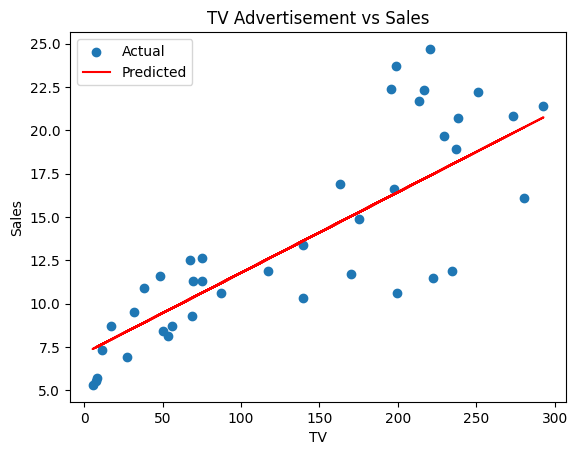

In [77]:
plt.scatter(X_Test, Y_Test, label='Actual')
plt.plot(X_Test, Y_Predicted, c='r', label='Predicted')

plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('TV Advertisement vs Sales')

plt.legend(loc='upper left')

plt.show()

# MULTIPLE LINEAR REGRESSION MODELING

In [78]:
X2 = df[['TV', 'Radio', 'Newspaper']]
Y2 = df['Sales']
X_train, X_test, Y_train, Y_test = train_test_split(X2, Y2, test_size=0.2, random_state=42) 

In [79]:
model2 = LinearRegression()
model2.fit(X_train, Y_train)

LinearRegression()

In [80]:
print(model2.intercept_, model2.coef_)

2.979067338122629 [0.04472952 0.18919505 0.00276111]


In [87]:
y_predicted = model2.predict(X_test)

print(mean_squared_error(Y_test, y_predicted), r2_score(Y_test, y_predicted))

# COSTS HAVE DECREASED and r2 valye has improved. R2 says % of target explained by features

3.1740973539761033 0.899438024100912


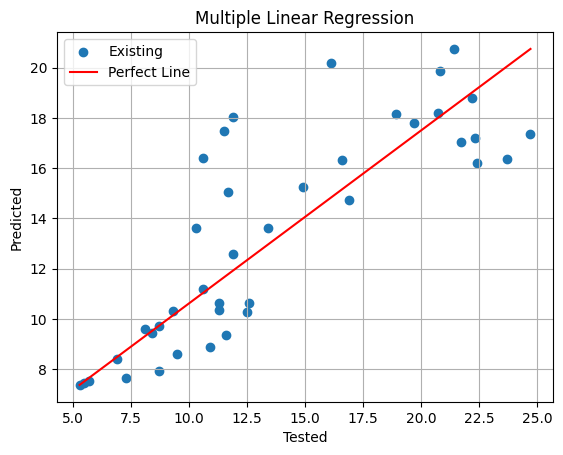

In [93]:
#TO VISUALIZE DATA FLUCTUATION

plt.scatter(Y_test, Y_Predicted, label='Existing')
plt.plot([Y_test.min(), Y_test.max()],[Y_Predicted.min(), Y_Predicted.max()], c='r', label='Perfect Line')

plt.xlabel('Tested')
plt.ylabel('Predicted')
plt.title('Multiple Linear Regression')

plt.grid(True)
plt.legend()
plt.show()

# STOCHIOSTATIC GRADIENT DESCENT

In [111]:
scaler = StandardScaler() # FOR BETTER RESULTS WE SCALE DATA
#ONLY FEATURES ARE NORMALIZED
X_scaled = scaler.fit_transform(X2) # NEW STEP
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y2, test_size=0.2, random_state=42) 


In [107]:

model = SGDRegressor(max_iter = 1000, tol=1e-3, random_state=42)
model.fit(X_train, Y_train)



SGDRegressor(random_state=42)

In [109]:
Y_Predicted = model.predict(X_test)
print(mean_squared_error(Y_test, Y_Predicted), r2_score(Y_test, Y_Predicted))

#Slightly Lower r2 than LinearRegressor()

3.1800307673495176 0.899250041280565


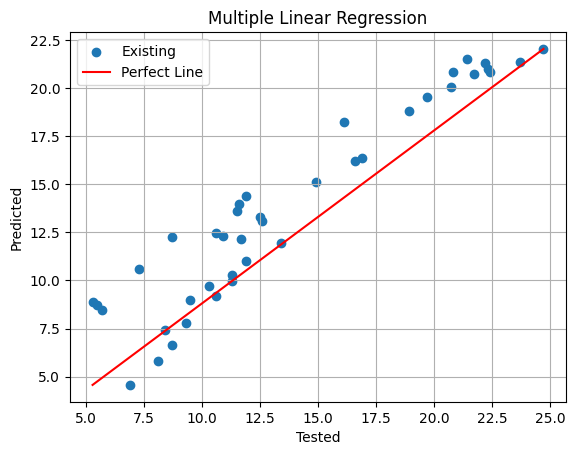

In [110]:
#TO VISUALIZE DATA FLUCTUATION

plt.scatter(Y_test, Y_Predicted, label='Existing')
plt.plot([Y_test.min(), Y_test.max()],[Y_Predicted.min(), Y_Predicted.max()], c='r', label='Perfect Line')

plt.xlabel('Tested')
plt.ylabel('Predicted')
plt.title('Multiple Linear Regression')

plt.grid(True)
plt.legend()
plt.show()

## Hence Multiple LinearRegression is Best Because OLS > Gradient Descent